In [1]:
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255.
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [15]:
model = keras.Sequential()
model.add(keras.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.Conv2D(64, 3, activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
modelpath = 'model/mnist_cnn.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [19]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200,
                   callbacks=[early_stopping, checkpointer], verbose=0)
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.07214, saving model to model\mnist_cnn.hdf5

Epoch 2: val_loss improved from 0.07214 to 0.05166, saving model to model\mnist_cnn.hdf5

Epoch 3: val_loss improved from 0.05166 to 0.04607, saving model to model\mnist_cnn.hdf5

Epoch 4: val_loss did not improve from 0.04607

Epoch 5: val_loss improved from 0.04607 to 0.04350, saving model to model\mnist_cnn.hdf5

Epoch 6: val_loss improved from 0.04350 to 0.04300, saving model to model\mnist_cnn.hdf5

Epoch 7: val_loss improved from 0.04300 to 0.04299, saving model to model\mnist_cnn.hdf5

Epoch 8: val_loss improved from 0.04299 to 0.04219, saving model to model\mnist_cnn.hdf5

Epoch 9: val_loss improved from 0.04219 to 0.04029, saving model to model\mnist_cnn.hdf5

Epoch 10: val_loss did not improve from 0.04029

Epoch 11: val_loss did not improve from 0.04029

Epoch 12: val_loss did not improve from 0.04029

Epoch 13: val_loss did not improve from 0.04029

Epoch 14: val_loss did not improve from

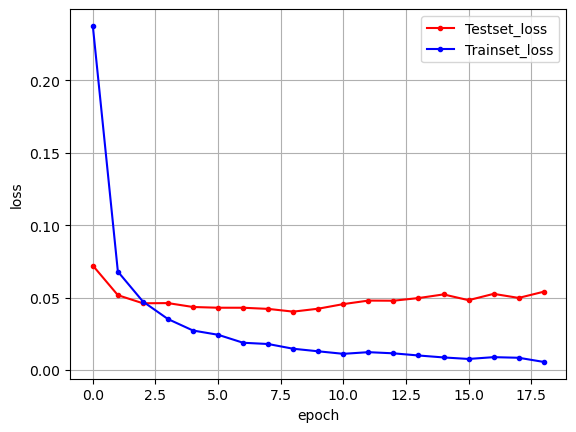

In [20]:
import numpy as np

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()